## Práctica 1

### Ejercicio 1

In [3]:
import numpy as np

In [4]:
T = 20 + 273.15
e = 
K = 8.6e-5 #[eV/k]

def DeltaV_Nerst(C_A_out, C_A_in, n_A):
    '''
    Potencial de equilibrio del ion A A dado por la ec de Nerst

    C_A_out: concentración de la especie A en el exterior
    C_A_in: concentración de la especie A en el interior
    n_A: valencia del ion A
    '''


    return K*T*/(n_A*e)*np.log(C_A_out/C_A_in)


A_vec = ["K+", "Na+", "Cl-"]
C_A_out_vec = np.array([20, 440, 550]) #[mM]
C_A_in_vec = np.array([430,50,65])
n_A_vec = np.array([1, 1, -1])

DeltaV_Nerst(C_A_out_vec, C_a_in_vec, n_A_vec)
for i in range(len(A_vec)):
    print("DeltaV_", A_vec[i], f"= {DeltaV_Nerst[i]}")
    

SyntaxError: invalid syntax (507249790.py, line 2)

### Ejercicio 2

**Comentario de Mato: La constante de Faraday indica cuántos coulombs hay en un mol (para iones monovalentes)**


In [ ]:
R = 15e-6 #[m]. Radio
c = 1e-6*1e4 #[F/m]. Capacitancia
DeltaV = 100e-3 #[V]. Diferencia de potencial que se busca generar


como
$$\Delta Q = c * Superficie * \Delta V $$
y
$$ \Delta Q = \Delta N_A *n_A * e $$
entonces
$$ N_A = \frac{c * 4 \pi R^2 * \Delta V}{n_Ae}$$

Por otro lado
$$ [A] = \frac{N_A}{Volumen * N_{Avogadro}} $$
en unidades de 

In [ ]:
N_Avogadro = 

N_A = c*4*pi*R**2*DeltaV/n_A/e

C_A = N_A/(4/3*pi*R**3)/N_avogadro



SyntaxError: invalid syntax (861112081.py, line 1)

### Ejercicio 3

**Comentario de Mato: corriente = flujo*area*carga**

In [ ]:
def j_A():
    '''
    Flujo del ion A dado por la ec. de Goldman
    '''

    return 

### Ejercicio 4
Está desarrollado en un notebook aparte

### Ejercicio 5
Se hace a partir del modelo del ejercicio 4. Se obtiene el fenómeno de rebote posibilitorio, en el caul aparece un potencial de acción a pesar de que $I < I_{ext}^c$, donde $I_{ext}^c$ corresponde a la mínima frecuencia necesaria para que se produzcan los spikes de forma periódica (en el modelo de Hodgikin-Huxley)

### Ejercicio 6
La simulación parece relativamente sencilla. Habría que obtener el comportamiento visto en clases. El cálculo analítico de la curva f-I se hace en mis notas

### Ejercicio 7: NO TERMINADO
Parece un ejercicio sencillo. Debería hacer bien los gráficos de las nullclinas y luego analizarlos. La única diferencia es que adimensionalizo el tiempo usando Tau

Modelo de FitzHugh-Nagumo

$$ \frac{dV}{dt} = f(V) + I - w $$

$$ \bar{\tau} \frac{dw}{dt} = -\gamma w + bV $$
donde
$$ f(V) = V(a-V)(V-1), 0<a<1,b>0,\gamma>0 $$
$$ \bar{\tau} = \frac{\tau_w}{\tau} $$

Creo que no afecta en nada adimensionalizar

In [15]:
#Def functions
from scipy.optimize import fsolve

def f(V,a):
    return V*(a-V)*(V-1)

def eq_nullclina_V(V, w, a, I):
    '''
    Nullclina de V. Ec tal que si la igualo a ce3ro tengo la nullclina
    '''
    return f(V,a) + I - w

def eq_nullclina_w(V, w, gamma, b):
    '''
    Nullclina de w. Ec tal que si la igualo a ce3ro tengo la nullclina
    '''
    return -gamma*w + b*V

def nullclina_V(w,a,I):

    V0 = 1
    return fsolve(eq_nullclina_V, V0, args=(w,a,I))

def nullclina_w(w,gamma,b):
    
    V0 = 1
    return fsolve(eq_nullclina_w, V0, args=(w,gamma,b))


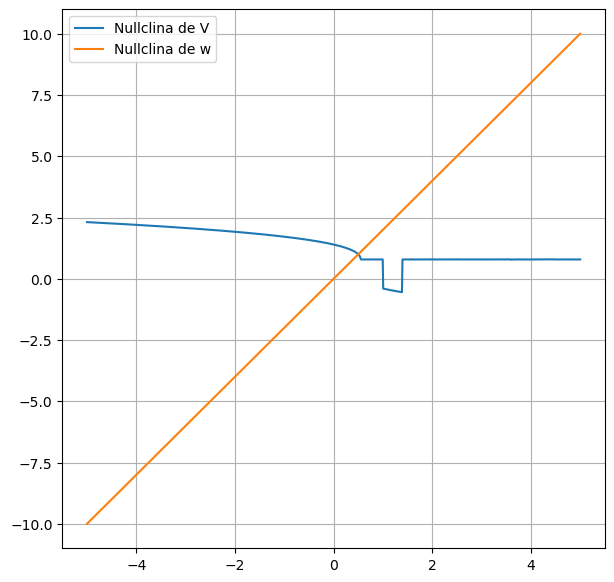

In [20]:
#Grafico caso particular

import matplotlib.pyplot as plt
import numpy as np


#Parametros
a = 0.5
b = 0.5
gamma = 1
I = 0.5

#Grafico
V = np.linspace(-5,5,1000)
w = np.linspace(-5,5,1000)

def plot_nullclinas(a, I, gamma, b):

    plt.figure(figsize=(7,7))
    plt.plot(w, np.vectorize(nullclina_V)(w, a, I), label="Nullclina de V")
    plt.plot(w, np.vectorize(nullclina_w)(w, gamma, b), label="Nullclina de w")
    plt.legend()
    plt.grid()
    plt.show()

plot_nullclinas(a,I,gamma,b)

In [10]:
#Varío parámetros

import ipywidgets as widgets
from IPython.display import display

widgets.interact(plot_nullclinas, a=widgets.FloatSlider(min=0, max=1, step=0.1, value=0.5), I=widgets.FloatSlider(min=-5, max=5, step=0.1, value=0), gamma=widgets.FloatSlider(min=0, max=5, step=0.1, value=1), b=widgets.FloatSlider(min=0, max=5, step=0.1, value=1))

interactive(children=(FloatSlider(value=0.5, description='a', max=1.0), FloatSlider(value=0.0, description='I'…

<function __main__.plot_nullclinas(a, I, gamma, b)>